### Import Dataset

We use the historical annual rate of return of 4 classes of assets dataset from the NYU Stern business school.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [301]:
data = pd.read_excel('data.xlsx')

### Explore data by plots

In [34]:
data.head()

,Year,S&P 500 (includes dividends),US T. Bond (10-year),Baa Corporate Bond,Inflation Rate
0,1928,0.438112,0.008355,0.032196,-0.011561
1,1929,-0.082979,0.042038,0.030179,0.005848
2,1930,-0.251236,0.045409,0.005398,-0.063953
3,1931,-0.438375,-0.025589,-0.156808,-0.093168
4,1932,-0.086424,0.087903,0.235896,-0.102740


In [11]:
data.shape

(96, 5)

In [312]:
stock = data.reset_index()['S&P 500 (includes dividends)']
us_bond = data.reset_index()['US T. Bond (10-year)']
print(np.max(us_bond))
corp_bond = data.reset_index()['Baa Corporate Bond']
inflation = data.reset_index()['Inflation Rate']
year = data.reset_index()['Year']

0.32814549486295586


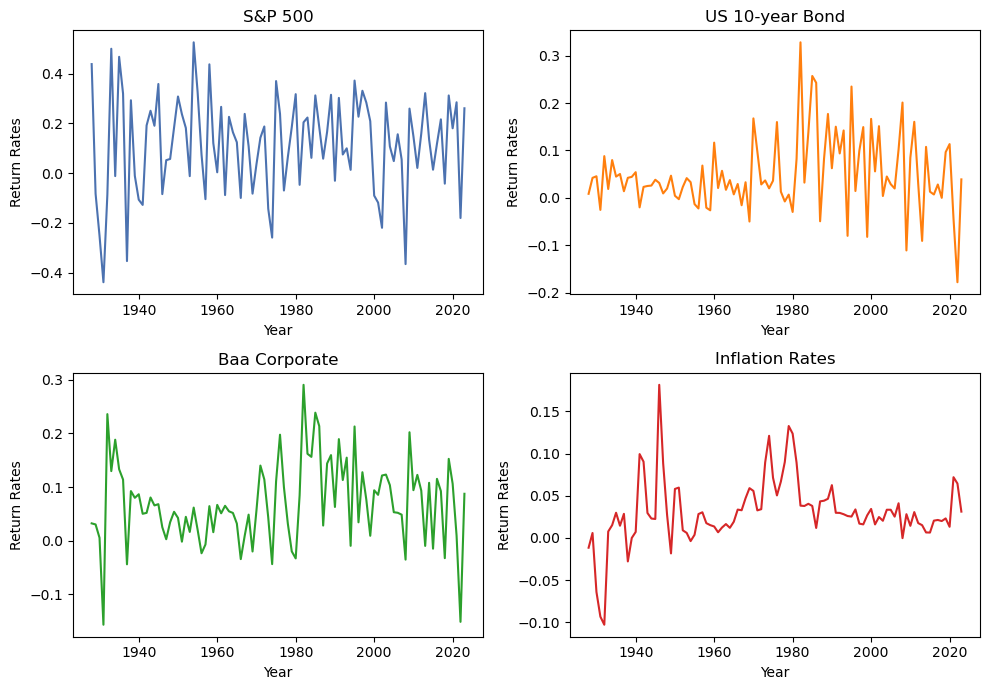

In [317]:
fig, axs = plt.subplots(2,2, figsize = (10,7))
axs[0, 0].plot(year, stock)
axs[0, 0].set_title('S&P 500')
axs[0, 1].plot(year, us_bond, 'tab:orange')
axs[0, 1].set_title('US 10-year Bond')
axs[1, 0].plot(year, corp_bond, 'tab:green')
axs[1, 0].set_title('Baa Corporate')
axs[1, 1].plot(year, inflation, 'tab:red')
axs[1, 1].set_title('Inflation Rates')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Return Rates')

fig.tight_layout()

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
    #ax.label_outer()
#plt.plot(stock,color='orange',label='S&P 500')
#plt.plot(us_bond,color='r',label='US 10-year Bond')
#plt.plot(corp_bond,color='b',label='Baa Corporate Bond')
#plt.plot(inflation,color='g',label='Inflation Rate')
#plt.legend()
#plt.title("Historical Returns of Different Assets 1928 - 2023")
#plt.close()
#plt.show()

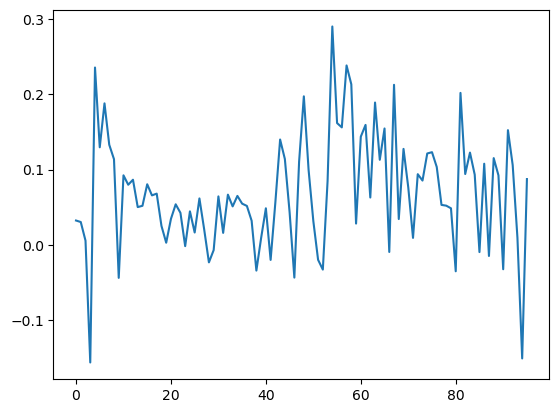

In [203]:
plt.plot(corp_bond)

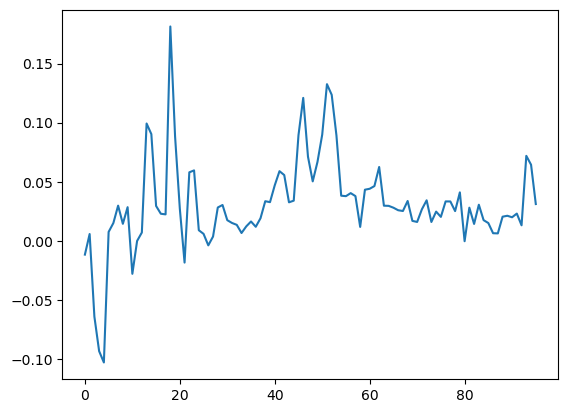

In [204]:
plt.plot(inflation)

In [124]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [30]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/92/2d/880fcd65e4414b05088193e6f2cfb86fdf90003dd2dd0f4d1bc465348f0e/tensorflow-2.15.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/c9/ea/fe2a69cc6cfebf7c7ee8a6357566fc1cbb91632bde5869b669a396accb5f/libclang-16.0.6-py2.py3-none-macosx_10_9_x86_64.whl.metadat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 MB 6.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 30.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 27.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.8/186.8 kB 6.8 MB/s 

In [206]:
stock_price.shape

(96,)

### Data Preprocessing - create training and testing set

In [126]:
scaler = MinMaxScaler()
stock = scaler.fit_transform(np.array(stock_price).reshape(-1,1))
len(stock)

96

In [207]:
stock = np.array(stock).reshape(-1,1)
train_size = int(len(stock)*0.70)
test_size = len(stock) - train_size
train_data,test_data = stock[0:train_size,:],stock[train_size:len(stock),:1]

In [208]:
test_data.shape

(29, 1)

In [209]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [226]:
time_step = 5
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [227]:
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(61, 5)
[[ 0.43811155 -0.08297947 -0.25123636 -0.43837549 -0.08642365]
 [-0.08297947 -0.25123636 -0.43837549 -0.08642365  0.49982225]
 [-0.25123636 -0.43837549 -0.08642365  0.49982225 -0.01188566]
 [-0.43837549 -0.08642365  0.49982225 -0.01188566  0.46740421]
 [-0.08642365  0.49982225 -0.01188566  0.46740421  0.3194341 ]
 [ 0.49982225 -0.01188566  0.46740421  0.3194341  -0.35336729]
 [-0.01188566  0.46740421  0.3194341  -0.35336729  0.29282654]
 [ 0.46740421  0.3194341  -0.35336729  0.29282654 -0.01097565]
 [ 0.3194341  -0.35336729  0.29282654 -0.01097565 -0.10672873]
 [-0.35336729  0.29282654 -0.01097565 -0.10672873 -0.12771456]
 [ 0.29282654 -0.01097565 -0.10672873 -0.12771456  0.19173763]
 [-0.01097565 -0.10672873 -0.12771456  0.19173763  0.2506131 ]
 [-0.10672873 -0.12771456  0.19173763  0.2506131   0.19030677]
 [-0.12771456  0.19173763  0.2506131   0.19030677  0.35821084]
 [ 0.19173763  0.2506131   0.19030677  0.35821084 -0.08429147]
 [ 0.2506131   0.19030677  0.35821084 -0.084291

### Use LSTM Model

In [228]:
model = Sequential()
model.add(LSTM(32,return_sequences = True,input_shape = (X_train.shape[1],1)))
#model.add(LSTM(10,return_sequences = True))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [229]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 5, 32)             4352      
                                                                 
 lstm_32 (LSTM)              (None, 4)                 592       
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 4949 (19.33 KB)
Trainable params: 4949 (19.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [230]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 32,verbose = 1)

Epoch 1/100
2/2 [==============================] - 3s 666ms/step - loss: 0.0487 - val_loss: 0.0365
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0465 - val_loss: 0.0356
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0443 - val_loss: 0.0349
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0424 - val_loss: 0.0343
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0404 - val_loss: 0.0340
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0391 - val_loss: 0.0339
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0375 - val_loss: 0.0340
Epoch 8/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0367 - val_loss: 0.0344
Epoch 9/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0357 - val_loss: 0.0351
Epoch 10/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0352 - val_loss: 0.0359
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0324 - val_loss: 0.0325
Epoch 85/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0323 - val_loss: 0.0325
Epoch 86/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0323 - val_loss: 0.0325
Epoch 87/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0323 - val_loss: 0.0325
Epoch 88/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0323 - val_loss: 0.0326
Epoch 89/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0323 - val_loss: 0.0326
Epoch 90/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0323 - val_loss: 0.0326
Epoch 91/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0323 - val_loss: 0.0325
Epoch 92/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0323 - val_loss: 0.0327
Epoch 93/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0323 - val_loss: 0.0326
Epoch 94/1

### Predictions and performance

In [231]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 18ms/step


In [156]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [232]:
print(math.sqrt(mean_squared_error(Y_train,train_predict)))
print(math.sqrt(mean_squared_error(Y_test,test_predict)))

0.17913092966641245
0.18057953417394773


In [233]:
trainPredictPlot = np.empty_like(stock)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[time_step : len(train_predict)+time_step,:] = train_predict

In [234]:
testPredictPlot = np.empty_like(stock)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(time_step)*2 + 1 : len(stock) - 1,:] = test_predict

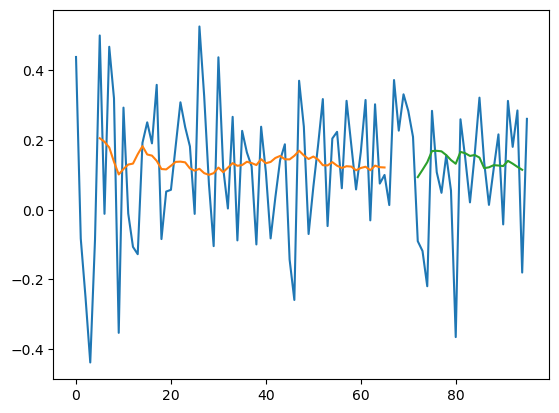

In [235]:
plt.plot(stock)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [236]:
us_bond = np.array(us_bond).reshape(-1,1)
train_size = int(len(us_bond)*0.70)
test_size = len(us_bond) - train_size
train_data,test_data = us_bond[0:train_size,:],us_bond[train_size:len(us_bond),:1]

In [237]:
time_step = 5
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [238]:
model = Sequential()
model.add(LSTM(32,return_sequences = True,input_shape = (X_train.shape[1],1)))
#model.add(LSTM(10,return_sequences = True))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [239]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 32,verbose = 1)

Epoch 1/100
2/2 [==============================] - 3s 669ms/step - loss: 0.0076 - val_loss: 0.0092
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0067 - val_loss: 0.0087
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0062 - val_loss: 0.0084
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0057 - val_loss: 0.0082
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0054 - val_loss: 0.0081
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0051 - val_loss: 0.0082
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0051 - val_loss: 0.0083
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - val_loss: 0.0085
Epoch 9/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0052 - val_loss: 0.0086
Epoch 10/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0052 - val_loss: 0.0086
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - val_loss: 0.0083
Epoch 85/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0048 - val_loss: 0.0083
Epoch 86/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0048 - val_loss: 0.0083
Epoch 87/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0048 - val_loss: 0.0084
Epoch 88/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0048 - val_loss: 0.0084
Epoch 89/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0048 - val_loss: 0.0084
Epoch 90/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - val_loss: 0.0083
Epoch 91/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0048 - val_loss: 0.0083
Epoch 92/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0048 - val_loss: 0.0084
Epoch 93/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - val_loss: 0.0084
Epoch 94/1

In [240]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


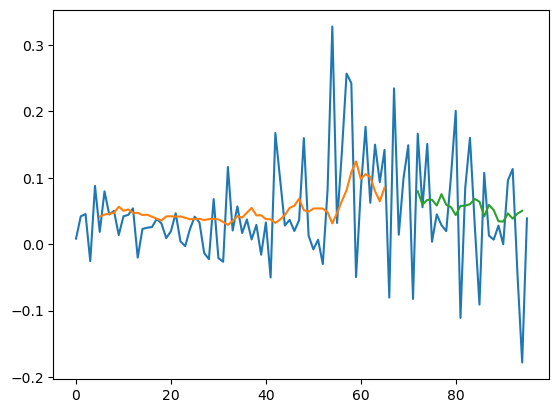

In [243]:
trainPredictPlot = np.empty_like(stock)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[time_step : len(train_predict)+time_step,:] = train_predict
testPredictPlot = np.empty_like(stock)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(time_step)*2 + 1 : len(stock) - 1,:] = test_predict
plt.plot(us_bond)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Using PyTorch to predict asset returns

Split training and testing data: 

In [164]:
#timeseries = data_no_year[["S&P 500 (includes dividends)"]].values.astype('float32')
timeseries = data_no_year.values.astype('float32')
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

Define create_dataset function with a look-back window

In [165]:
import torch

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [166]:
lookback = 5
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([59, 5, 4]) torch.Size([59, 5, 4])
torch.Size([27, 5, 4]) torch.Size([27, 5, 4])


Create LSTM model: 

In [177]:
...
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=4, hidden_size=32, num_layers=1, batch_first=True)
        self.linear = nn.Linear(32, 4)
        self.dropout = nn.Dropout(p = 0.2)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

Train the neural network: 

In [178]:
#import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = LSTMModel()
optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay=1e-5)
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=16)

n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 0.1325, test RMSE 0.1269
Epoch 100: train RMSE 0.1084, test RMSE 0.1080
Epoch 200: train RMSE 0.1048, test RMSE 0.1155
Epoch 300: train RMSE 0.1040, test RMSE 0.1165
Epoch 400: train RMSE 0.1028, test RMSE 0.1168
Epoch 500: train RMSE 0.1006, test RMSE 0.1164
Epoch 600: train RMSE 0.0973, test RMSE 0.1169
Epoch 700: train RMSE 0.0940, test RMSE 0.1179
Epoch 800: train RMSE 0.0916, test RMSE 0.1184
Epoch 900: train RMSE 0.0893, test RMSE 0.1188


Plot the result: 

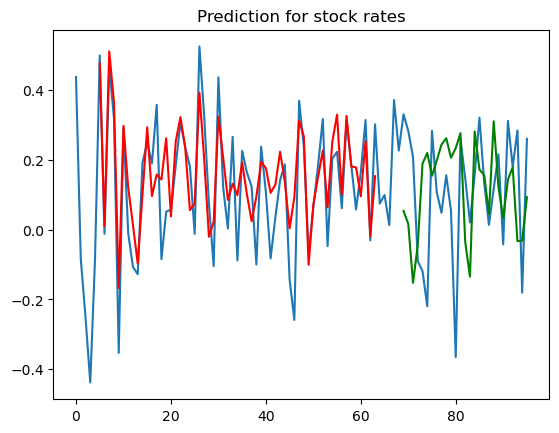

In [179]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries[:,0])
plt.plot(train_plot[:,0], c='r')
plt.plot(test_plot[:,0], c='g')
plt.title("Prediction for stock rates")
plt.show()

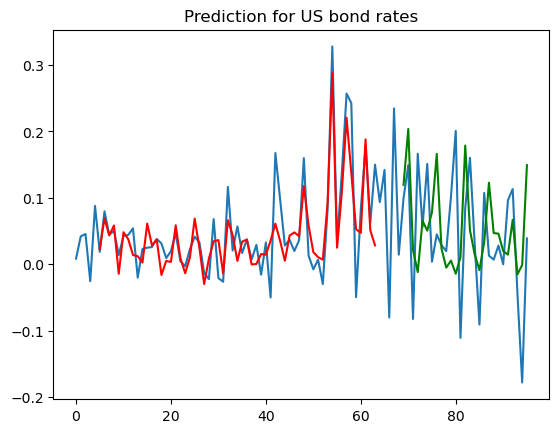

In [180]:
plt.plot(timeseries[:,1])
plt.plot(train_plot[:,1], c='r')
plt.plot(test_plot[:,1], c='g')
plt.title("Prediction for US bond rates")
plt.show()

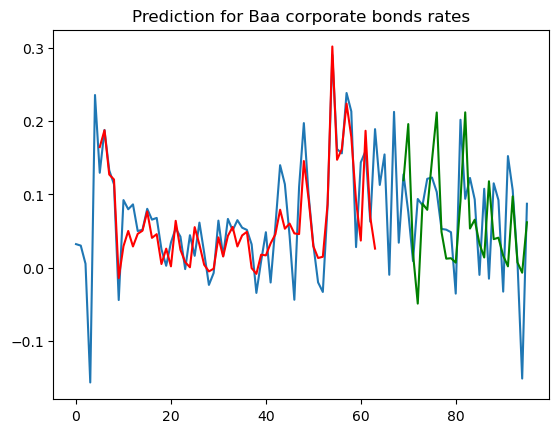

In [181]:
plt.plot(timeseries[:,2])
plt.plot(train_plot[:,2], c='r')
plt.plot(test_plot[:,2], c='g')
plt.title("Prediction for Baa corporate bonds rates")
plt.show()

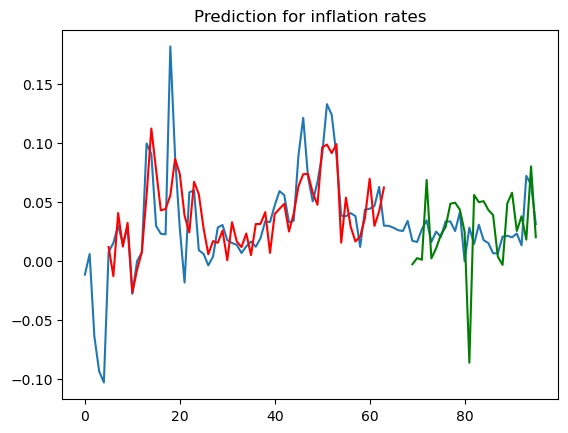

In [182]:
plt.plot(timeseries[:,3])
plt.plot(train_plot[:,3], c='r')
plt.plot(test_plot[:,3], c='g')
plt.title("Prediction for inflation rates")
plt.show()

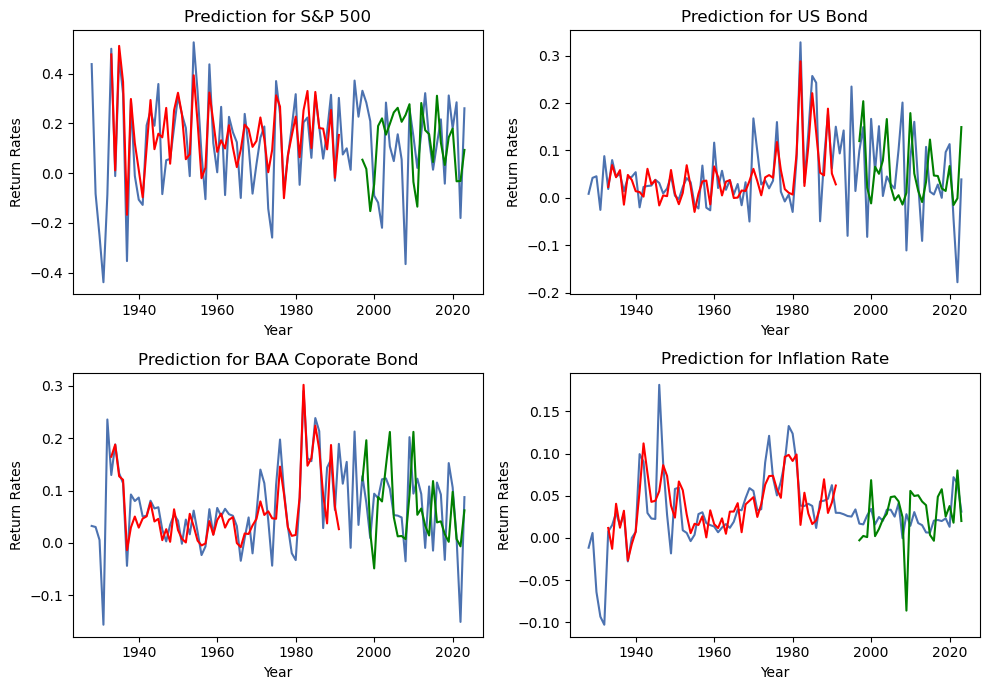

In [318]:
fig, axs = plt.subplots(2,2, figsize = (10,7))
axs[0, 0].plot(year, timeseries[:,0])
axs[0, 0].plot(year, train_plot[:,0], c='r')
axs[0, 0].plot(year, test_plot[:,0], c='g')
axs[0, 0].set_title('Prediction for S&P 500')


axs[0, 1].plot(year, timeseries[:,1])
axs[0, 1].plot(year, train_plot[:,1], c='r')
axs[0, 1].plot(year, test_plot[:,1], c='g')
axs[0, 1].set_title('Prediction for US Bond')

axs[1, 0].plot(year, timeseries[:,2])
axs[1, 0].plot(year, train_plot[:,2], c='r')
axs[1, 0].plot(year, test_plot[:,2], c='g')
axs[1, 0].set_title('Prediction for BAA Coporate Bond')

axs[1, 1].plot(year, timeseries[:,3])
axs[1, 1].plot(year, train_plot[:,3], c='r')
axs[1, 1].plot(year, test_plot[:,3], c='g')
axs[1, 1].set_title('Prediction for Inflation Rate')


for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Return Rates')

fig.tight_layout()

In [183]:
print(timeseries[:,0])

[ 0.43811154 -0.08297946 -0.25123635 -0.4383755  -0.08642364  0.49982226
 -0.01188566  0.46740422  0.3194341  -0.3533673   0.29282653 -0.01097565
 -0.10672873 -0.12771456  0.19173762  0.2506131   0.19030677  0.35821083
 -0.08429147  0.052       0.05704575  0.18303223  0.3080554   0.23678464
  0.18150988 -0.01208205  0.5256332   0.32597333  0.07439512 -0.1045736
  0.43719956  0.12056457  0.00336535  0.26637712 -0.0881146   0.22611926
  0.16415456  0.12399243 -0.09970954  0.23802966  0.10814863 -0.08241371
  0.03561145  0.1422115   0.18755363 -0.14308047 -0.25901785  0.36995137
  0.23831    -0.06979704  0.06509284  0.1851949   0.31735244 -0.0470239
  0.20419055  0.22337157  0.06146142  0.3123515   0.18494579  0.05812722
  0.16537192  0.31475183 -0.03064452  0.30234843  0.07493728  0.09967051
  0.01325921  0.371952    0.22680967  0.33103654  0.28337952  0.20885351
 -0.09031819 -0.11849759 -0.21966048  0.283558    0.10742776  0.04834478
  0.15612558  0.05484735 -0.36552343  0.25935233  0.1

### Find Optimal Asset Allocation using Mean-Variance Optimization

In [244]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for cvxpy<2.0.0,>=1.1.19 from https://files.pythonhosted.org/packages/87/5a/f86e039c09694b7d3370b4f1d219c40d8396add76d4584dd98bd190b5ff2/cvxpy-1.4.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for osqp>=0.6.2 from https://files.pythonhosted.org/packages/9a/08/bd3cacf6b99d639f99b276219553e74f8f800888ec0e01a39cb0ca22f0f1/osqp-0.6.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.6 MB/s eta 0:00:00
  Obtaining dependency information for clarabel>=0.5.0 from https://files.pythonhosted.org/packages/55/1e/16864d79381d95d5c1eea427295b8d927c7964f1b5a388ad8c3d5b75ab3a/clarabel-0.6.0-cp37-abi3-macosx_10_9_x86_64.macosx_11_0_arm64.macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for scs>=3.0 from https://files.pythonhosted.org/packages/83/60/177a341f6c5caa2f003f24f33ea845

### Risk Models

we need to quantifying asset risks in order to make better decisions on how to allocate our funds. We will use the covariance matrix, which describes asset volatilities and their co-dependence.

In [37]:
from sklearn.covariance import LedoitWolf
data_no_year = data.drop(columns = ['Year'])

In [274]:
Shrink_Cov = LedoitWolf().fit(data_no_year.head(95))

In [284]:
S = Shrink_Cov.covariance_

In [276]:
sample_cov = data_no_year.cov()

### Find optimal assets allocation

In [280]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt import objective_functions
from pypfopt import plotting
#print(data_no_year)

In [283]:
mu = test_plot[95, :]

In [299]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
#ef.add_constraint(lambda w: w[0] >= 0.2)
#ef.add_constraint(lambda w: w[2] == 0.15)
#ef.add_constraint(lambda w: w[3] <= 0.10)

#fig, ax = plt.subplots()
#plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
#plt.show()

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_99797/3877472914.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


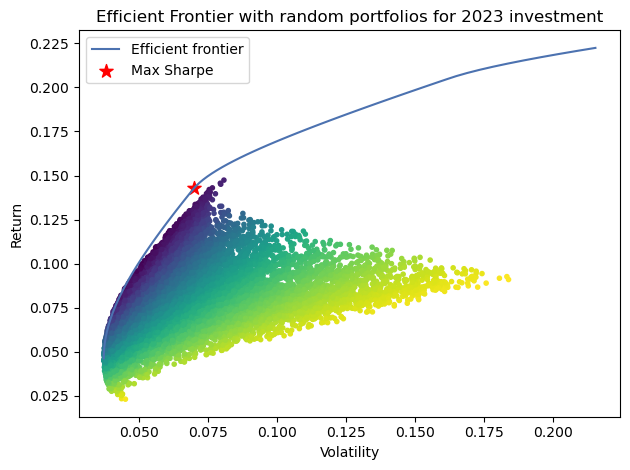

In [300]:
# 100 portfolios with risks between 0.10 and 0.30
#risk_range = np.linspace(0.10, 0.40, 100)
#plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range,
                                #show_assets=True, showfig=True)
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios for 2023 investment")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

### Compare different strategies over most recent 12 year period

In [219]:
#print(test_plot.shape)
print(data_no_year.head(84))
print(data_no_year.iloc[84].tolist())

    S&P 500 (includes dividends)  US T. Bond (10-year)  Baa Corporate Bond  \
0                       0.438112              0.008355            0.032196   
1                      -0.082979              0.042038            0.030179   
2                      -0.251236              0.045409            0.005398   
3                      -0.438375             -0.025589           -0.156808   
4                      -0.086424              0.087903            0.235896   
..                           ...                   ...                 ...   
79                      0.054847              0.102099            0.048446   
80                     -0.365523              0.201013           -0.035403   
81                      0.259352             -0.111167            0.202096   
82                      0.148211              0.084629            0.094105   
83                      0.020984              0.160353            0.122629   

    Inflation Rate  
0        -0.011561  
1         0.005848  


In [268]:
total_amount_opt = 10000
amounts_opt = []
amounts_opt.append(total_amount_opt)
total_amount_allin = 10000
amounts_allin = []
amounts_allin.append(total_amount_allin)
total_amount_fixed = 10000
amounts_fixed = []
amounts_fixed.append(total_amount_fixed)
total_amount_best = 10000
amounts_best = []
amounts_best.append(total_amount_best)
total_amount_inflation = 10000
amounts_inflation = []
amounts_inflation.append(total_amount_inflation)

fixed_ratio = [0.6, 0.2, 0.2, 0]
inflation_ratio = [0, 0, 0, 1]

init_year = 84; 
for year in range(12):
    #predicted rates for the current year
    pred_rates = test_plot[init_year + year, :]
    #print(pred_rates)
    #find the estimated covariace matrix
    shrink_cov = LedoitWolf().fit(data_no_year.head(init_year + year))
    cov_matrix = shrink_cov.covariance_
    #get the optimal ratio
    ef = EfficientFrontier(pred_rates, cov_matrix)
    ef.add_objective(objective_functions.L2_reg, gamma=0.1)
    #w = ef.max_quadratic_utility(risk_aversion=0.5)
    w = ef.max_sharpe(risk_free_rate=0.0175)
    opt_ratio = list(w.values())
    #print(opt_ratio)
    
    #get true rates for the year
    true_rates = data_no_year.iloc[init_year + year].to_numpy()
    annual_rate_opt = np.sum(opt_ratio * true_rates)
    #print(annual_rate_opt)
    total_amount_opt = total_amount_opt * (1 + annual_rate_opt)  #money for next month for optimization method
    amounts_opt.append(total_amount_opt)
    
    annual_rate_fixed = np.sum(fixed_ratio * true_rates)
    #print(annual_rate_fixed)
    total_amount_fixed = total_amount_fixed * (1 + annual_rate_fixed) #money for next month for fixed allocation method
    amounts_fixed.append(total_amount_fixed)
    
    #pick the highest predicted rate and all in
    allin_ratio = (pred_rates == np.max(pred_rates)).astype(int)
    #print(allin_rates)
    annual_rate_allin = np.sum(allin_ratio * true_rates)
    #print(annual_rate_allin)
    total_amount_allin = total_amount_allin * (1 + annual_rate_allin)
    amounts_allin.append(total_amount_allin)
    
    #highest possible money
    best_ratio = (true_rates == np.max(true_rates)).astype(int)
    annual_rate_best = np.sum(best_ratio * true_rates)
    total_amount_best = total_amount_best * (1 + annual_rate_best)
    amounts_best.append(total_amount_best)
    
    #baseline model
    annual_rate_inflation = np.sum(inflation_ratio * true_rates)
    total_amount_inflation = total_amount_inflation * (1 + annual_rate_inflation)
    amounts_inflation.append(total_amount_inflation)
    
    
print(total_amount_fixed)
print(total_amount_opt)
print(total_amount_allin)
print(total_amount_best)
print(total_amount_inflation)

29454.436453688795
36390.736230988085
44812.63396210969
65234.76525289852
13568.981638546466


/Users/langsong/anaconda3/lib/python3.11/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/Users/langsong/anaconda3/lib/python3.11/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/Users/langsong/anaconda3/lib/python3.11/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/Users/langsong/anaconda3/lib/python3.11/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/Users/langsong/anaconda3/lib/python3.11/site-packag

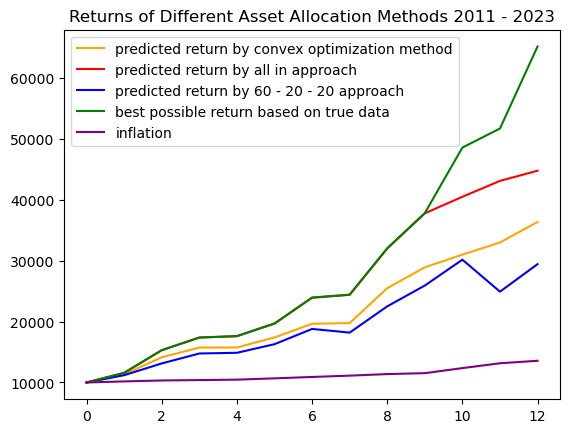

In [269]:
plt.plot(amounts_opt,color='orange',label='predicted return by convex optimization method')
plt.plot(amounts_allin,color='r',label='predicted return by all in approach')
plt.plot(amounts_fixed,color='b',label='predicted return by 60 - 20 - 20 approach')
plt.plot(amounts_best,color='g',label='best possible return based on true data')
plt.plot(amounts_inflation,color='purple',label='inflation')
plt.legend()
plt.title("Returns of Different Asset Allocation Methods 2011 - 2023")
#plt.close()
plt.show()